# Capstone Project part 2: EDA  #
## Your FistName Lastname ##
**Please use this template to fill in your code and comments (* you can modify for your project need *) ** 


**Add your readme here** if you have any special configuration or steps needed to follow to run your code 


** EDA comment by instructor**


## Step 0: What are you working on
** Your project title:**  
** What are the outcome of your project:**  
** Data Source:(provide a link to dataset if available)**  

**Load packages:**

In [5]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#more packages import as needed

<a id='load_data'></a>

### 1. Load the data

---

Import the csv into a pandas DataFrame.

In [78]:
#put you csv file in the same folder as this jupyter notebook file
#read in your data into a dataframe like df = pd.read_csv("yourfile.csv")
df = pd.read_csv("/Users/Twest94/Documents/DS 5K/consolidated_prices.csv")
#df.head()
df.tail()

,Date,TGT,LOW,PNW,SPGI,HRL,MAS,PCG,MAC,TMK,PCAR
602,5/24/18,70.940002,96.489998,78.019997,199.320007,35.419998,37.520000,43.830002,54.750000,86.209999,65.230003
603,5/25/18,71.209999,96.690002,78.389999,200.360001,35.860001,37.900002,44.660000,54.750000,85.709999,64.639999
604,5/29/18,71.699997,95.779999,78.889999,197.199997,36.509998,37.549999,42.340000,55.320000,83.129997,63.509998
605,5/30/18,73.470001,97.419998,79.820000,199.520004,37.169998,38.160000,43.090000,56.150002,85.099998,64.269997
606,5/31/18,72.889999,95.010002,79.610001,197.500000,35.889999,37.270000,43.330002,55.630001,84.830002,62.230000


### 2. Describe the basic format of the data and the columns

---

Use the `.head()` function (and optionally pass in an integer for the number of rows you want to see) to examine what the loaded data looks like. This is a good initial step to get a feel for what is in the csv and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

Describe what you see

In [7]:
df.dtypes

Date     object
TGT     float64
LOW     float64
PNW     float64
SPGI    float64
HRL     float64
MAS     float64
PCG     float64
MAC     float64
TMK     float64
PCAR    float64
dtype: object

---

Use the `.info()` function  to see how many rows and data types you got. This will also tell you how many rows of each column have content

Describe what you see

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
Date    607 non-null object
TGT     607 non-null float64
LOW     607 non-null float64
PNW     607 non-null float64
SPGI    607 non-null float64
HRL     607 non-null float64
MAS     607 non-null float64
PCG     607 non-null float64
MAC     607 non-null float64
TMK     607 non-null float64
PCAR    607 non-null float64
dtypes: float64(10), object(1)
memory usage: 52.2+ KB


In [9]:
df.head()

,Date,TGT,LOW,PNW,SPGI,HRL,MAS,PCG,MAC,TMK,PCAR
0,1/4/16,67.183975,71.943558,58.900368,92.016640,36.720364,27.009048,50.130516,70.521255,55.184464,44.150124
1,1/5/16,68.362328,72.096474,59.194500,92.327248,37.466785,26.902178,50.206276,73.237701,55.860538,44.159489
2,1/6/16,67.668106,70.662941,59.277222,91.317772,37.593540,26.692575,49.922195,72.589653,54.782722,44.168854
3,1/7/16,67.485428,68.875816,59.258846,88.444687,36.912838,25.473957,49.675991,71.684166,53.861679,42.830109
4,1/8/16,65.201790,67.738548,58.845215,85.911316,36.696892,24.889025,49.297226,69.961967,53.322769,42.343311


<a id='drop'></a>

### 2. Drop unwanted columns

---
You may want to focus on selected columns as your input features. You can drop those unwanted columns.

The `.drop()` built-in function can be used to get rid of a column. When removing a column, we need to specify `axis=1` to the function.

For the record, the `.index` attribute holds the row indices. This is the the sister attribute to the `.columns` attribute that we work with more often.



In [10]:
# Remove the unneccesary column:
# no unwanted columns

### 3. Clean corrupted columns (if there is any)

---

Did you notice when you examined the `dtypes` attribute that some of the columns were of type "object", indicating that they were string. For some case, these columns should be numeric instead.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

In [11]:
# Use this to inspect what content you have in columns marked 'object'
# df['column_name'].values 

In [12]:
# If you find a pattern of corrupted content in the column marked as object type, 
# you may replace it with some meaningful numerical content
# df['column_name'] = [ float(x.replace('old','new')) for x in df['column_name']]


In [13]:
#check to see if the corrupted columns got corrected and become a numerical columns
#Look into df.info() again


### 4. Determine how many observations are missing

---

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing and for which columns.

A handy way to look at how many null values there are per column with pandas is:

```python
boston.isnull().sum()
```

The `.isull()` built-in function will convert the columns to boolean `True` and `False` values (returning a new dataframe) where null values are indicated by `True`. 

The `.sum()` function tacked on to the back of that will then sum these boolean columns, and the total number of null values per column will be returned.

In [14]:
# How many columns have how null values?
df.isnull().sum()

Date    0
TGT     0
LOW     0
PNW     0
SPGI    0
HRL     0
MAS     0
PCG     0
MAC     0
TMK     0
PCAR    0
dtype: int64

**Drop the null values.** 

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values. In this case, we will just drop the rows.

The `.dropna()` function will drop any rows that have _**ANY**_ null values for you.  Use this carefully as you could drop many more rows than expected.

** Instead of dropping null values, you may want to impute them (replace with the mean(numeric type) or most frequently occured item(object type) **

In [15]:
# use df.shape to check the size before dropping anything

In [16]:
# Now drop the rows with null values
# df.dropna(inplace=True)
# check the new size after dropping by df.shape

### 5. Make the column names more descriptive

---

Often it is annoying to have to memorize what the codes mean for columns, or reference the codebook whenever I want to know the meaning of a variable. It often makes sense to rename columns that are not descriptive.

There is more than one way to do this, but one easy way is to use the `.rename()` function.


In [17]:
# Look at the original column names
df.columns

Index(['Date', 'TGT', 'LOW', 'PNW', 'SPGI', 'HRL', 'MAS', 'PCG', 'MAC', 'TMK',
       'PCAR'],
      dtype='object')

There two popular methods to rename dataframe columns.
1. Using a _dictionary substitution_, which is very useful if you only want to rename a few of the columns. This method uses the `.rename()` function.
2. Using a _list replacement_, which is quicker than writing out a dictionary, but requires a full list of names.

In [18]:
# Dictionary Method
# new_column={
#         'column1_old':'column1_new',
#         'column2_old':'column2_new',
#         #more here,
#         'columnlast_old':'columnlast_new'    
# }
# df.rename(columns=new_column, inplace =True)
# df.head(2)

In [19]:
# List Replacement Method
# new_names = ['column1_new','column2_new',
#              #more here
#             'columnlast_new']
# df.columns=new_names
# df.head(2)

<a id='describe'></a>

### 6. Describe the summary statistics for the columns

---

The `.describe()` function gives summary statistics for each of your variables. What are some, if any, oddities you notice about the variables based on this output?

In [20]:
# A:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TGT,607.0,63.842571,7.881389,48.295090,56.951647,64.219612,70.455650,77.347748
LOW,607.0,77.561937,8.465399,60.833733,71.835285,76.655617,81.239948,106.877960
PNW,607.0,76.467213,7.393643,58.146652,71.004047,76.370003,82.405418,90.230644
SPGI,607.0,135.556980,32.148910,78.398560,111.677384,128.265335,157.839454,200.437195
HRL,607.0,34.783443,2.573885,29.666290,33.251022,34.364895,36.175041,42.375641
MAS,607.0,35.043501,4.838458,22.870993,31.610958,34.635315,38.412593,46.150337
PCG,607.0,57.336306,8.206375,38.240002,53.326412,58.549900,64.507225,71.002007
MAC,607.0,63.405774,7.462555,50.777073,56.803623,62.925316,69.693344,81.118835
TMK,607.0,72.064070,11.875994,47.600521,61.293060,74.964920,82.033928,93.142609
PCAR,607.0,60.767368,7.943460,41.472656,53.772160,63.135555,66.354774,78.361931


In [79]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0   2016-01-04
1   2016-01-05
2   2016-01-06
3   2016-01-07
4   2016-01-08
Name: Date, dtype: datetime64[ns]

### 7. Plot variables with potential outliers using boxplots.

---
You can use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent
** What did you see and conclude out these boxplots?

In [ ]:
# Index(['Date', 'TGT', 'LOW', 'PNW', 'SPGI', 'HRL', 'MAS', 'PCG', 'MAC', 'TMK',
#        'PCAR'],
#       dtype='object')

In [90]:
df = df.set_index(df['Date'])
df.drop(['Date'],axis=1)

,TGT,LOW,PNW,SPGI,HRL,MAS,PCG,MAC,TMK,PCAR
Date,,,,,,,,,,
2016-01-04,67.183975,71.943558,58.900368,92.016640,36.720364,27.009048,50.130516,70.521255,55.184464,44.150124
2016-01-05,68.362328,72.096474,59.194500,92.327248,37.466785,26.902178,50.206276,73.237701,55.860538,44.159489
2016-01-06,67.668106,70.662941,59.277222,91.317772,37.593540,26.692575,49.922195,72.589653,54.782722,44.168854
2016-01-07,67.485428,68.875816,59.258846,88.444687,36.912838,25.473957,49.675991,71.684166,53.861679,42.830109
2016-01-08,65.201790,67.738548,58.845215,85.911316,36.696892,24.889025,49.297226,69.961967,53.322769,42.343311
2016-01-11,66.151779,69.458786,59.543785,85.872482,36.635860,24.518562,49.458195,69.926453,53.342361,42.343311
2016-01-12,67.010437,70.022636,58.551083,86.115150,37.325951,24.879274,49.770683,69.961967,53.528530,42.305859
2016-01-13,65.439293,66.802002,58.707344,81.892876,36.823647,23.923878,49.515015,69.358322,52.440918,41.472656
2016-01-14,64.315773,66.811554,59.571358,82.407303,37.287128,24.323584,50.575577,68.399567,52.823051,42.792667


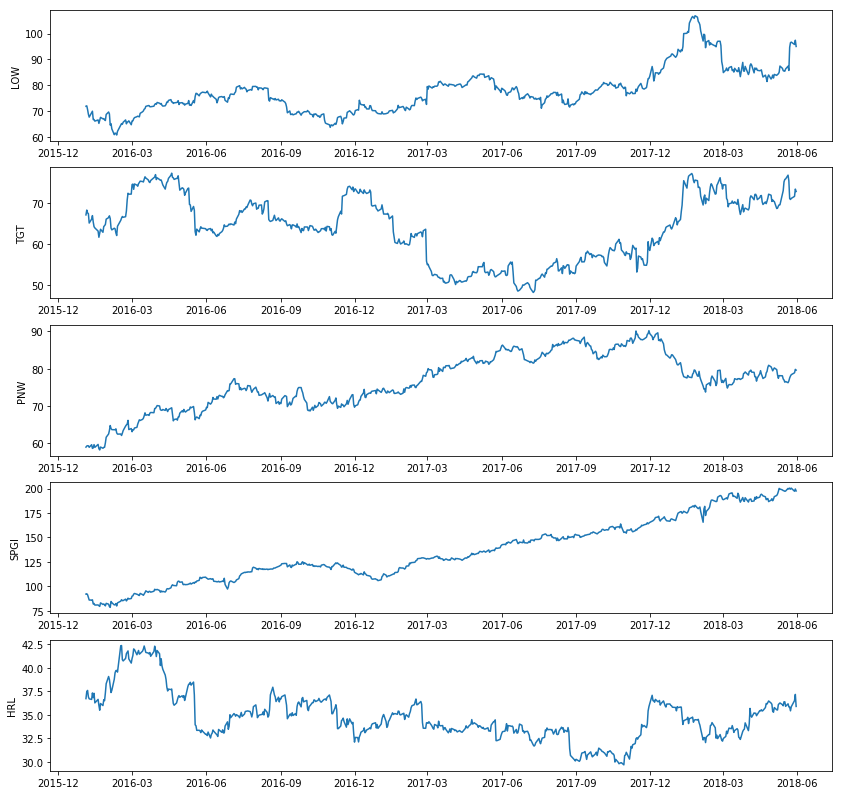

In [65]:
fig = plt.figure(figsize = (14,14))

ax1 = fig.add_subplot(5, 1, 1)
ax1.plot(df['Date'],df['LOW'])
plt.ylabel('LOW')

ax2 = fig.add_subplot(5, 1, 2)
ax2.plot(df['Date'],df['TGT'])
plt.ylabel('TGT')

ax3 = fig.add_subplot(5, 1, 3)
ax3.plot(df['Date'],df['PNW'])
plt.ylabel('PNW')

ax4 = fig.add_subplot(5, 1, 4)
ax4.plot(df['Date'],df['SPGI'])
plt.ylabel('SPGI')

ax5 = fig.add_subplot(5, 1, 5)
ax5.plot(df['Date'],df['HRL'])
plt.ylabel('HRL')



plt.show()

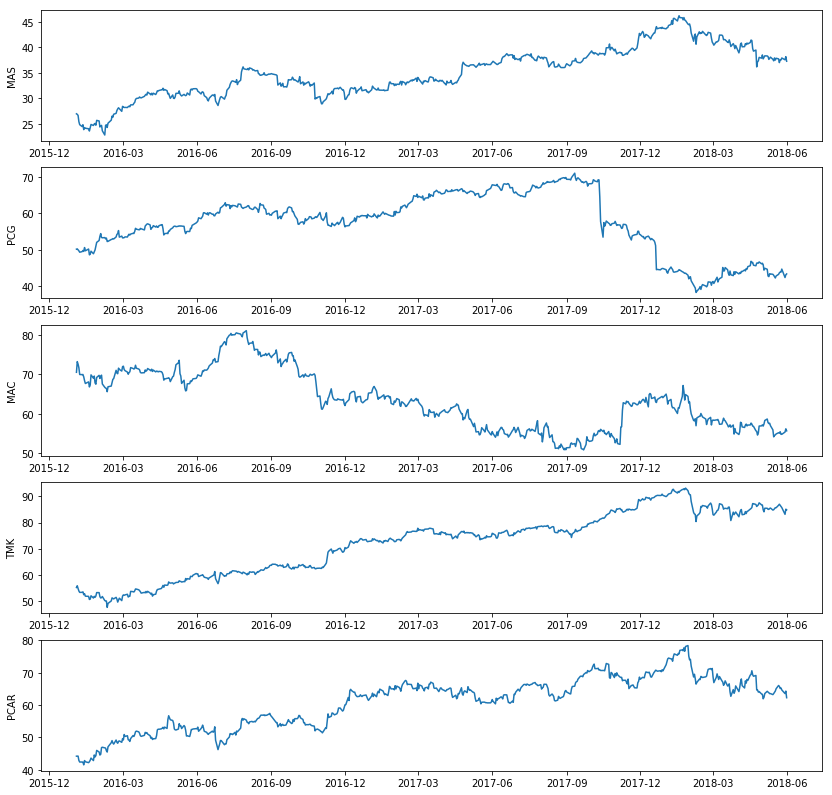

In [68]:
fig1 = plt.figure(figsize = (14,14))

ax6 = fig1.add_subplot(5, 1, 1)
ax6.plot(df['Date'],df['MAS'])
plt.ylabel('MAS')

ax7 = fig1.add_subplot(5, 1, 2)
ax7.plot(df['Date'],df['PCG'])
plt.ylabel('PCG')

ax8 = fig1.add_subplot(5, 1, 3)
ax8.plot(df['Date'],df['MAC'])
plt.ylabel('MAC')

ax9 = fig1.add_subplot(5, 1, 4)
ax9.plot(df['Date'],df['TMK'])
plt.ylabel('TMK')

ax10 = fig1.add_subplot(5, 1, 5)
ax10.plot(df['Date'],df['PCAR'])
plt.ylabel('PCAR')

plt.show()

### 8.Other relevants plots 

---
What can you infer out of these additonal plots as related to your problem?

In [20]:
# A:


<a id='standardization'></a>

### 9. Standardizing variables

---

Rescaling variables is very common, and sometimes essential. For example, when we get to regularization of models the rescaling procedure becomes a requirement before fitting the model.

Here we'll rescale the variables using a procedure called "standardization", which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

Standardization is not complicated:

    standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
    
Note: Nothing else is changed about the distribution of the variable. It doesn't become normally distributed.


Also print out the mean and standard deviation of the original variable.

In [21]:
# select the columns out of your dataframe to be standardized (usually it will be your input features)
# X= df[['column1','column2', 'more if needed']]
#check its mean and standard deviation before standardizing
# X.mean()
# X.std()


In [23]:
# scaler = StandardScaler()
# X_standardized = scaler.fit_transform(X)
#check its mean and standard deviation after standardizing
#X_standardized.mean()
# X_standardized.std()
#What difference did you see? Describe here


### 10. Correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.



####  Correlation


A much more common metric, and one directly calculable from the covariance, is the correlation.

Again, let $X$ and $Y$ be our two variables, with covariance $cov(X, Y)$ that we calculated above:

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$



#### The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in `.corr()` function. Use it below on the boston dataset.

It is very useful to get a feel for what is related and what is not, which can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [23]:
df.corr()

,TGT,LOW,PNW,SPGI,HRL,MAS,PCG,MAC,TMK,PCAR
TGT,1.000000,0.110578,-0.590760,-0.052500,0.520174,-0.106973,-0.702795,0.454714,-0.224059,-0.236455
LOW,0.110578,1.000000,0.478170,0.777640,-0.306961,0.826290,-0.471178,-0.350148,0.739575,0.689116
PNW,-0.590760,0.478170,1.000000,0.681327,-0.647066,0.751528,0.300616,-0.676962,0.788270,0.772244
SPGI,-0.052500,0.777640,0.681327,1.000000,-0.461701,0.902670,-0.390935,-0.666263,0.909811,0.809140
HRL,0.520174,-0.306961,-0.647066,-0.461701,1.000000,-0.474248,-0.289631,0.582992,-0.572567,-0.580224
MAS,-0.106973,0.826290,0.751528,0.902670,-0.474248,1.000000,-0.258761,-0.537539,0.888894,0.862478
PCG,-0.702795,-0.471178,0.300616,-0.390935,-0.289631,-0.258761,1.000000,-0.059407,-0.226472,-0.094558
MAC,0.454714,-0.350148,-0.676962,-0.666263,0.582992,-0.537539,-0.059407,1.000000,-0.715927,-0.692463
TMK,-0.224059,0.739575,0.788270,0.909811,-0.572567,0.888894,-0.226472,-0.715927,1.000000,0.942536
PCAR,-0.236455,0.689116,0.772244,0.809140,-0.580224,0.862478,-0.094558,-0.692463,0.942536,1.000000


**Seaborn also has a great way of showing this to us visually, if colors stick out to you more than decimol values.**

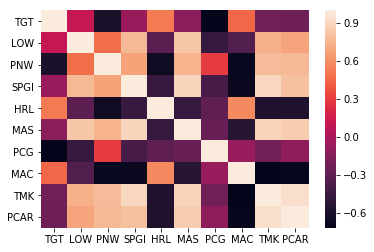

In [44]:
# A:
sns.heatmap(df.corr())

## more EDA related to your dataset here:

## Describe has this EDA helped you to understand and get ready for your next step in your capstone project. How?